# Assignment: Running a Classification Tree

## Assignment 1 of Machine Learning for Data Analysis

<img src="DTree3.png" />
## Figure 1. Decision tree

It is frequently claimed that children that come from a home where the parents split before they were 18 were more likely to get into trouble with the law because they would have had less support or guiding influence growing up. So in order to test that hypothesis I have chosen a few different predictors to see what would be the likely cause of the target variable, "drug use", which would be a good indicator of deviant behaviour and potential trouble with the law.

The predictors are, parents splitting before 18, highest grade achived as a proxy for level of intelligence, white as a proxy of ethnicity and job industry and job type to see if any of these factors have any prediction value for the target variable. The variables were applied in this order "WHITE","PARENTS_SPLIT","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE".

So when reading the above decision tree we see that X[1] which corresponds to the "Parents Split" feature was the first feature to separate the sample into two subgroups. At the next node it is split on the "White" feature and we have a sample of 3520 presented to that node. Those 3520 are the number of samples presented to the second node which after splitting presents 2603 and 917 samples to the nodes below. For the sample of 2603 the decision tree classifier selects "Highest Grade" feature to split on.

In summary the decision tree classifier selects the features "Parents split, White and Higest grade" as the order in which the best prediction of drug use can be obtained.

## Python Code

In [74]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

The data set used in this Decision Tree example is the "U.S. National Epidemiological Survey on Alcohol and Related Conditions" survey data. From this dataset a subset of the following columns is selected. 
'S1Q1D5','S1Q2D','S1Q2E','S1Q2F','S1Q6A','S1Q9A','S1Q9B','S1Q9C','DGSTATUS'. This subset of data was then exported and stored on a public dropbox folder and can be read in using the below command.

In [75]:
nesarc_data = pd.read_csv("https://dl.dropboxusercontent.com/u/84673878/nesarc_output_cut.csv")

Give the columns meaningful names.

In [76]:
cols = ["WHITE","PARENTS_SPLIT","SPLIT_AGE","WHICH_PARENT_REMAINED","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","EMPLOYER_TYPE","DGSTATUS"]
nesarc_data.columns = cols
#We just take a subset of that data
nesarc_data = nesarc_data[["WHITE","PARENTS_SPLIT","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","DGSTATUS"]]

We then add NaNs where we have missing values. This is because the Python Scikit Decision Tree library can not handle missing values at the present time.

In [77]:
#Add NaN's for missing values
row_index = nesarc_data.JOB_INDUSTRY == " "
nesarc_data.loc[row_index, 'JOB_INDUSTRY'] = np.NaN
row_index = nesarc_data.JOB_TYPE == " "
nesarc_data.loc[row_index, 'JOB_TYPE'] = np.NaN

Convert the target to a binary variable, 0 = never used drugs, 1 = current or past drug user

In [78]:
row_index = nesarc_data.DGSTATUS == 3
nesarc_data.loc[row_index, 'DGSTATUS'] = 0
row_index = nesarc_data.DGSTATUS == 2
nesarc_data.loc[row_index, 'DGSTATUS'] = 1

In [79]:
#then convert all the columns to numeric
cols = ["WHITE","PARENTS_SPLIT","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","DGSTATUS"]
nesarc_data[cols] = nesarc_data[cols].apply(pd.to_numeric)

Check to see all columns are now a numeric data type.

In [80]:
#Check all columns are numeric data types
nesarc_data.dtypes

WHITE              int64
PARENTS_SPLIT      int64
HIGHEST_GRADE      int64
JOB_INDUSTRY     float64
JOB_TYPE         float64
DGSTATUS           int64
dtype: object

Remove all the NaNs

In [81]:
nesarc_data = nesarc_data.dropna()

Select the predictors from the data.

In [82]:
predictors = nesarc_data[["WHITE","PARENTS_SPLIT","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE"]]

Choose the "Drug Status" column as the target to predict for.

In [83]:
targets = nesarc_data[["DGSTATUS"]]

Do a 60/40 split on the data to create the training and test datasets.

In [84]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

After select various parameters, the ones chosen below seem to work best for the creating the Decision Tree.

In [85]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth = 3, min_samples_split = 5, random_state = 1)
classifier=classifier.fit(pred_train,tar_train)

Run the prediction on the test data and check how well it performs.

In [86]:
predictions=classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[8906,    0],
       [2863,    0]])

In [87]:

sklearn.metrics.accuracy_score(tar_test, predictions)

0.75673379216585945

Feature importance

In [88]:
classifier.feature_importances_

array([ 0.20332437,  0.42632954,  0.35768807,  0.        ,  0.01265802])

## Dispaly the decision tree output

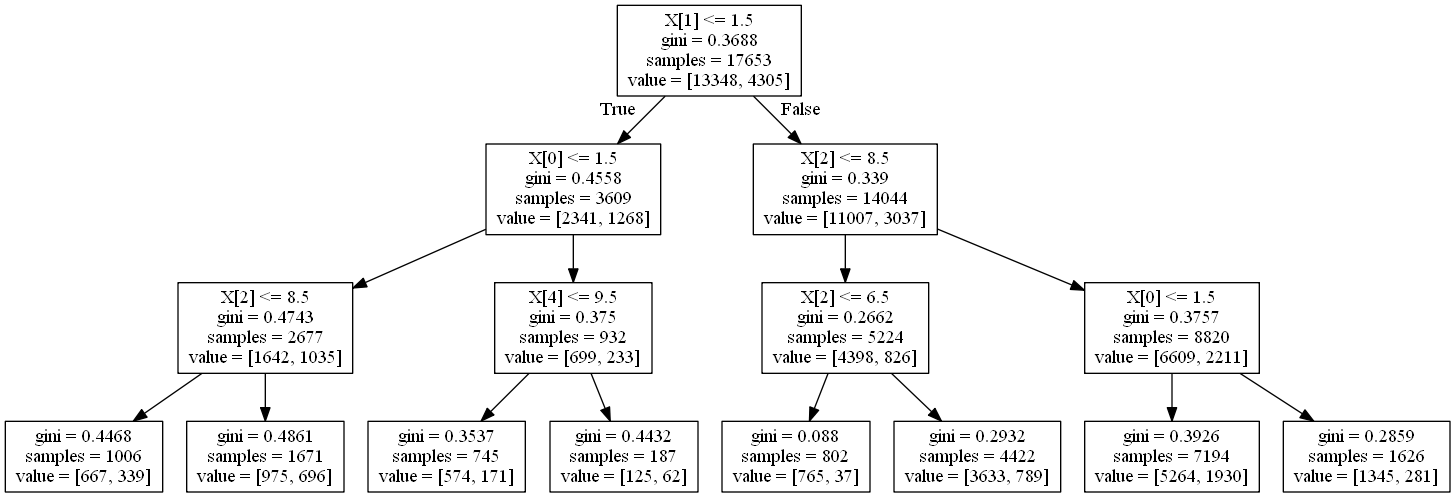

In [89]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())